In [ ]:
# Carregar o modelo do arquivo\
import pickle

with open('X_test_selected.pkl', 'rb') as file:
    X_test_selected = pickle.load(file)

with open('X_train_selected.pkl', 'rb') as file:
    X_train_selected = pickle.load(file)

with open('y_trainBP.pickle', 'rb') as file:
    y_train = pickle.load(file)

with open('y_testBP.pickle', 'rb') as file:
    y_test = pickle.load(file)



In [ ]:
################################################################################# Tuning hiperparameters
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {
      'hidden_layer_sizes':  [ [30], [36], [40], [47], [30,30], [36,36], [40,40], [47,47] ],
      'activation' : ['identity', 'logistic', 'tanh', 'relu'],
       'solver' : ['lbfgs', 'sgd', 'adam'],
       'alpha' : [0.0001, 1e-16, 0.1],
       'max_iter' : [20000],
       'learning_rate_init' : [0.1, 0.001,0.000001],
       'learning_rate' : ['constant', 'invscaling', 'adaptive']

  }

classifier = MLPClassifier()
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid,
                            cv = 2, n_jobs = -1, verbose = 2)



grid_search.fit(X_train_selected, y_train)
print(grid_search.best_params_)



#{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': [36, 36], 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 20000, 'solver': 'lbfgs'}
#################################################################################

Fitting 2 folds for each of 2592 candidates, totalling 5184 fits
{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': [47, 47], 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 20000, 'solver': 'adam'}


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


model = MLPClassifier(learning_rate_init=0.1,activation='relu',
                      hidden_layer_sizes= [47, 47], alpha= 0.1,
                      learning_rate= 'constant', solver= 'adam',max_iter=20000)





model.fit(X_train_selected,y_train)








In [ ]:
x = accuracy_score(y_test, model.predict(X_test_selected), sample_weight=None)
print(float(x))

0.7407407407407407


In [ ]:
X_test = X_test_selected.copy()

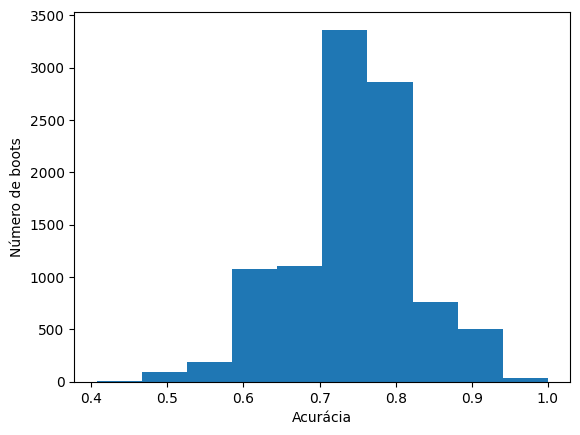

Intervalo de confiança : [0.5555555555555556,0.8888888888888888]
Acurácia 'real' do modelo performada no teste : 0.7407407407407407


In [ ]:
import random
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


def new_boot(X_test, y_test):

  novo_X = X_test.copy()
  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)



    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]

    c= c+1


  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):

  return accuracy_score(novo_Y, model.predict(novo_X), sample_weight=None)


# calcula a distribuição dos boots

numero_boots = 10001
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots)
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show()

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, model.predict(X_test), sample_weight=None)))

In [ ]:
#################################################
#Salvar modelo treinado
import pickle



with open('modeloBP_74.pkl', 'wb') as file:
    pickle.dump(model, file)




In [16]:
import pickle



with open('X_test_selected.pkl', 'rb') as file:
    X_test_selected = pickle.load(file)

with open('X_train_selected.pkl', 'rb') as file:
    X_train_selected = pickle.load(file)

with open('modeloBP_74%.pkl', 'rb') as file:
    model = pickle.load(file)

with open('y_testBP.pickle', 'rb') as file:
    y_test = pickle.load(file)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
x = accuracy_score(y_test, model.predict(X_test_selected), sample_weight=None)
print(x)

0.7407407407407407


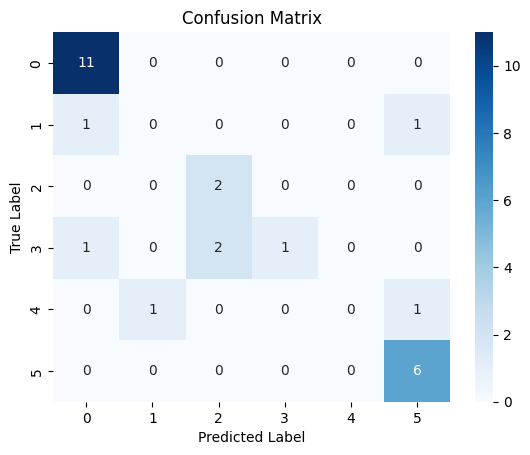

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'model' é o seu modelo treinado e 'X_test', 'y_test' são seus dados de teste
# Primeiro, você precisa fazer previsões usando o seu conjunto de teste
y_pred = model.predict(X_test_selected)

# Gere a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Para melhor visualização, você pode usar o Seaborn para plotar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

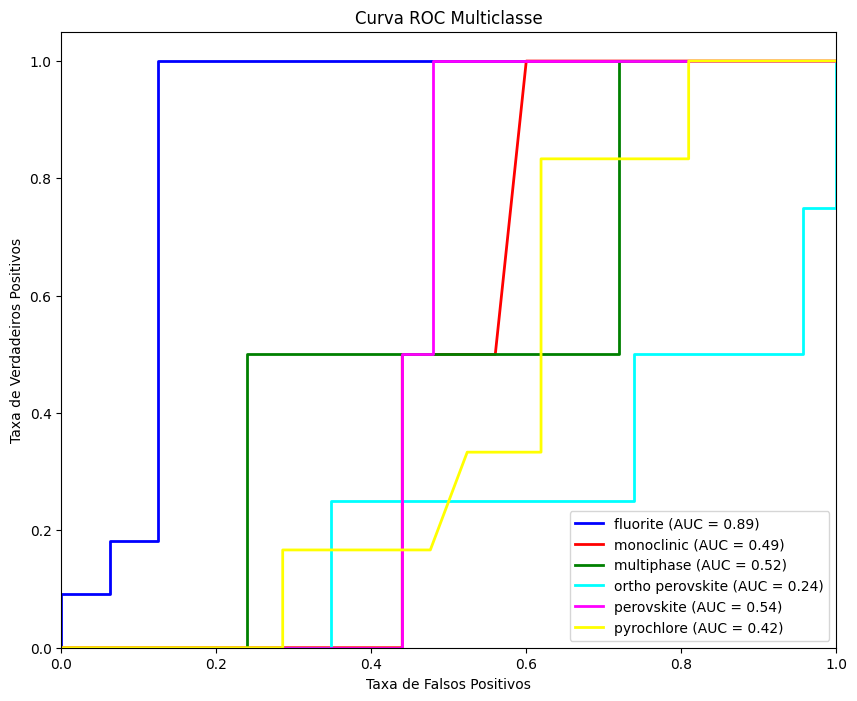

In [ ]:
#Rock

import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Supondo que y_test já esteja disponível e não seja binário
# Se y_test já for binário (em formato one-hot), você pode pular esta etapa
# Binarizar os rótulos em uma configuração um contra todos
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

class_labels = ['fluorite', 'monoclinic', 'multiphase','ortho perovskite', 'perovskite', 'pyrochlore', 'roxksalt', 'spinel']

# Prever probabilidades. Certifique-se de que seu modelo tem um método `predict_proba`
y_score = model.predict_proba(X_test_selected)

# Computar ROC curve e ROC area para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot da curva ROC para cada classe
colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'gray', 'orange', 'purple'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
              label='{0} (AUC = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

#plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()



In [ ]:
!pip install shap==0.44.1

In [13]:
import sklearn
print(sklearn.__version__)

1.2.2


In [4]:
#SHAP
#!pip install shap
import shap
import pickle

# Carregar o modelo do arquivo
with open('modeloBP_74%.pkl', 'rb') as file:
    model = pickle.load(file)

with open('X_train_selected.pkl', 'rb') as file:
    X_train = pickle.load(file)

with open('X_test_selected.pkl', 'rb') as file:
    X_test = pickle.load(file)


# Usar KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calcular SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)




  0%|          | 0/27 [00:00<?, ?it/s]

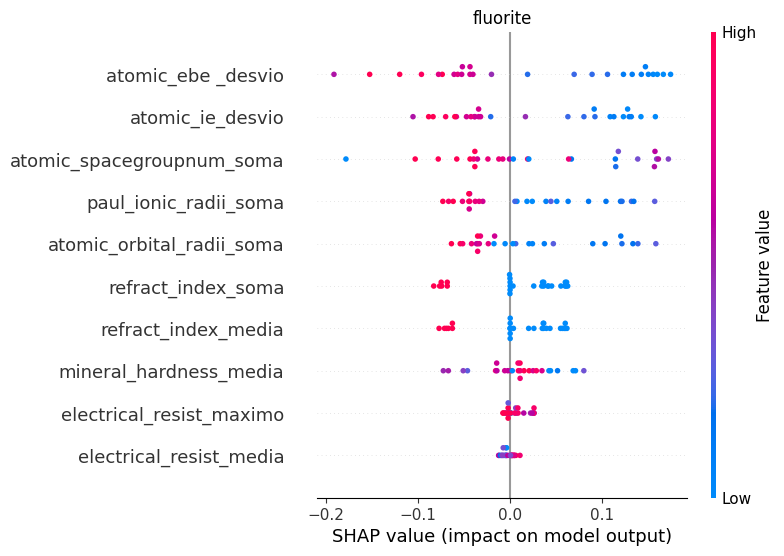

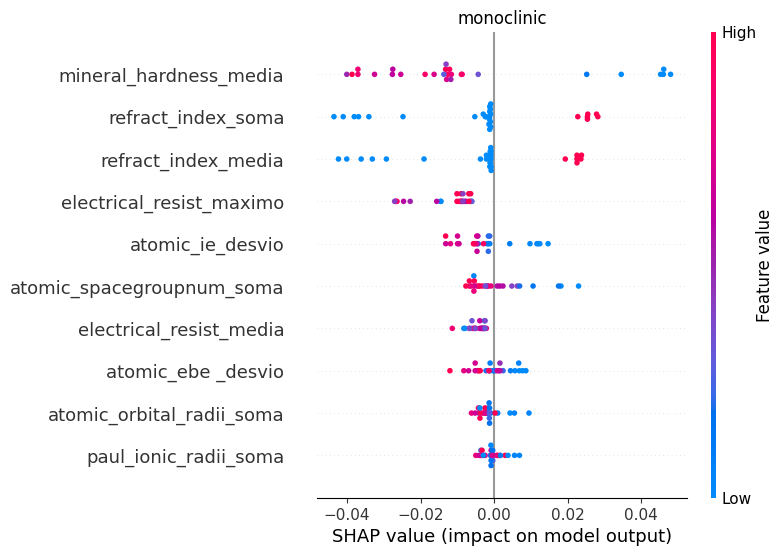

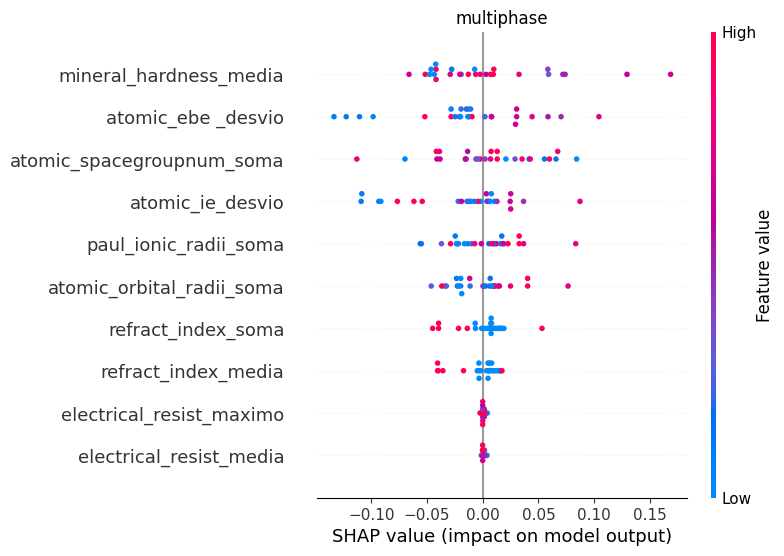

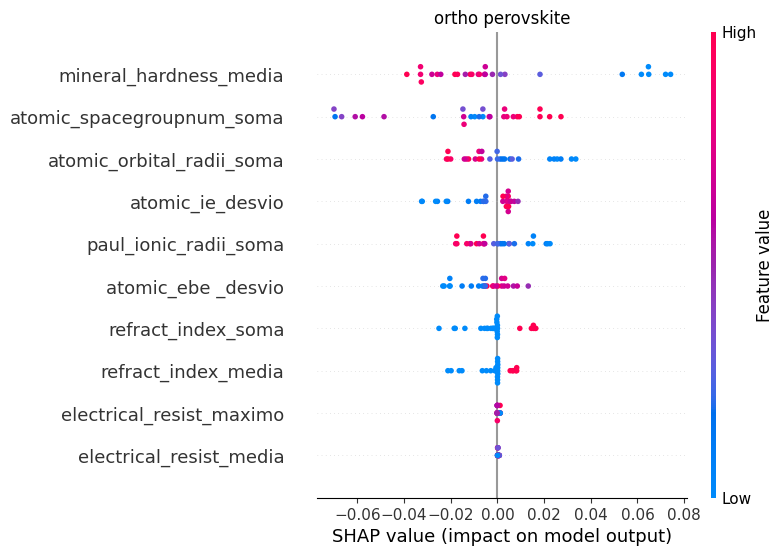

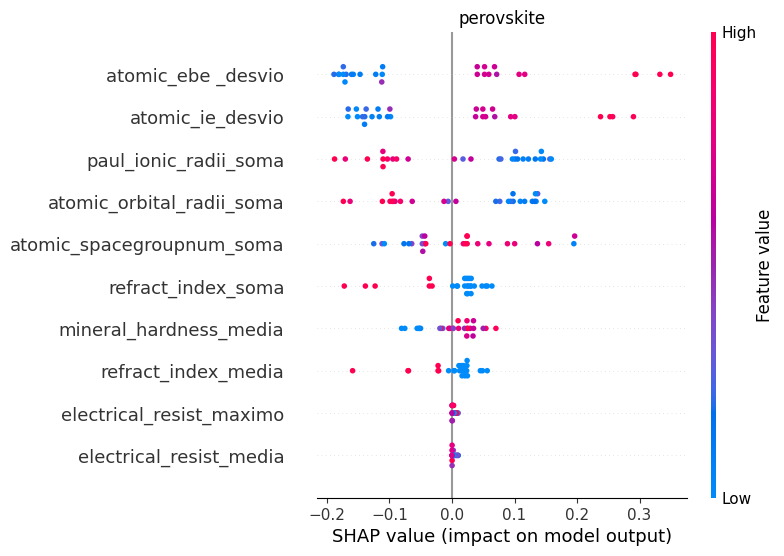

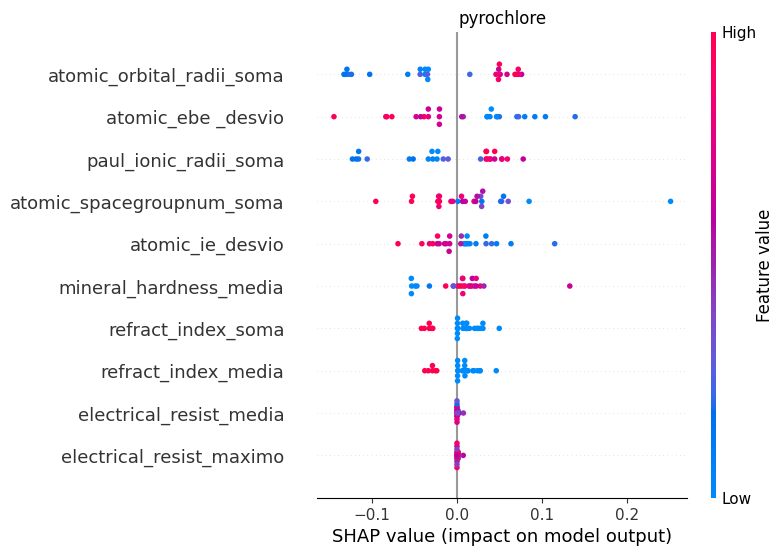

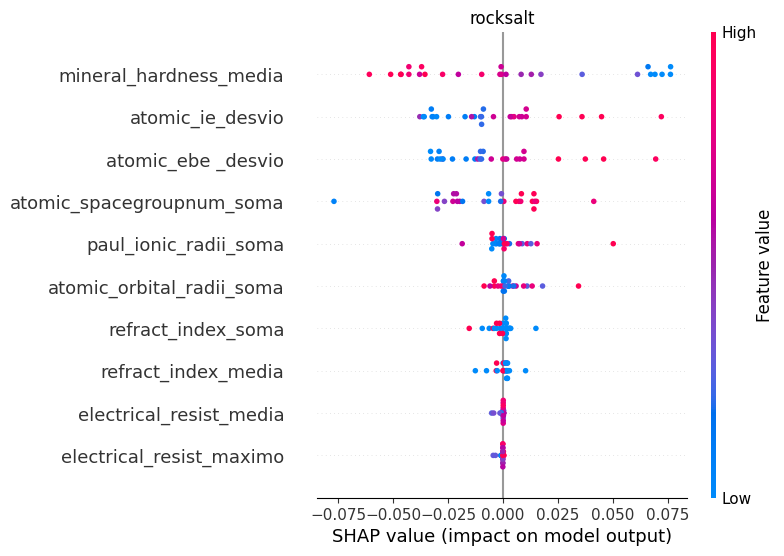

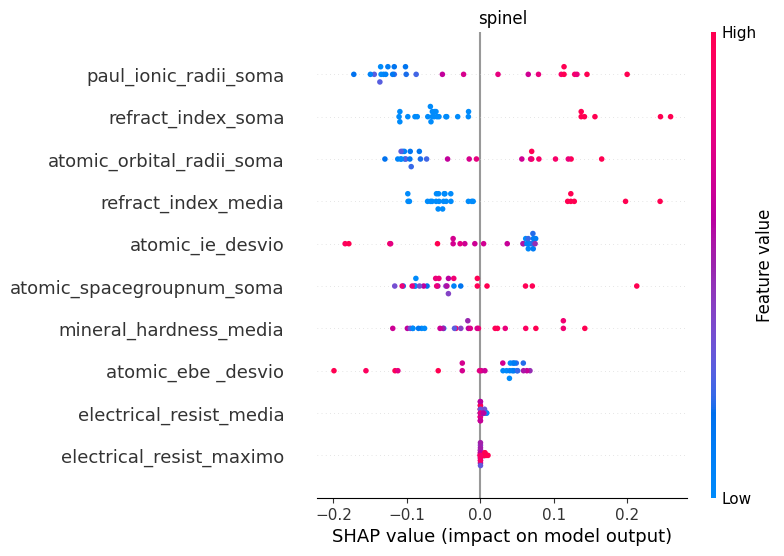

In [21]:

import matplotlib.pyplot as plt

feature_names  = ['refract_index_media', 'electrical_resist_maximo', 'atomic_ebe _desvio',
       'atomic_orbital_radii_soma', 'paul_ionic_radii_soma',
       'mineral_hardness_media', 'electrical_resist_media',
       'refract_index_soma', 'atomic_ie_desvio', 'atomic_spacegroupnum_soma']

lista_classes = model.classes_


# Visualizar a importância das features para a primeira classe como exemplo
count = 0
while len (shap_values)>count:

  shap.summary_plot(shap_values[count], X_test, plot_type="dot", feature_names = feature_names, show = False)
  plt.title(lista_classes[count])
  plt.show()

  count = count +1
